# 1- Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from glob import glob
from PIL import Image


# 2- Load and Explore Data

In [2]:
!unzip archive.zip -d archive

Archive:  archive.zip
   creating: archive/archive/
  inflating: archive/__MACOSX/._archive  
   creating: archive/archive/s34/
  inflating: archive/__MACOSX/archive/._s34  
   creating: archive/archive/s33/
  inflating: archive/__MACOSX/archive/._s33  
   creating: archive/archive/s5/
  inflating: archive/__MACOSX/archive/._s5  
   creating: archive/archive/s2/
  inflating: archive/__MACOSX/archive/._s2  
   creating: archive/archive/s32/
  inflating: archive/__MACOSX/archive/._s32  
   creating: archive/archive/s35/
  inflating: archive/__MACOSX/archive/._s35  
   creating: archive/archive/s3/
  inflating: archive/__MACOSX/archive/._s3  
   creating: archive/archive/s4/
  inflating: archive/__MACOSX/archive/._s4  
   creating: archive/archive/s26/
  inflating: archive/__MACOSX/archive/._s26  
   creating: archive/archive/s19/
  inflating: archive/__MACOSX/archive/._s19  
   creating: archive/archive/s21/
  inflating: archive/__MACOSX/archive/._s21  
   creating: archive/archive/s17/


In [3]:
# Construct file names
import os
images = []
for root, subdirs, files in os.walk('archive/archive'):
    # print(subdirs)
    # print(root)
    images.extend([root+'/'+ file for file in files ])

 # Change file format
import os
from PIL import Image

for file in images:
    filename, extension  = os.path.splitext(file)
    if extension == ".pgm":
        new_file = "{}.png".format(filename)
        with Image.open(file) as im:
            im.save(new_file)


In [4]:

#Load data
from keras.utils import image_dataset_from_directory
width, height = 92, 112
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.3
directory ='/content/archive/archive'
train_ds, val_ds = image_dataset_from_directory(
directory = directory,
image_size = (width, height),
validation_split = validation_split,
subset = "both",
seed = seed_train_validation,
color_mode = 'grayscale',
shuffle = shuffle_value)

Found 400 files belonging to 40 classes.
Using 280 files for training.
Using 120 files for validation.


In [5]:

# Extract images and labels from the datasets
def dataset_to_array(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())
    return np.array(images), np.array(labels)

X_train, y_train = dataset_to_array(train_ds)
X_val, y_val = dataset_to_array(val_ds)

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (280, 92, 112, 1)
Validation data shape: (120, 92, 112, 1)


# 3- build and Train Model

In [6]:
from tensorflow.keras import layers, models

def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(92, 112, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(np.unique(y_train)), activation='softmax')
    ])


    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build and train the model
model = build_cnn_model()

history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_val, y_val)
)



Epoch 1/15
18/18 [==============================] - 4s 34ms/step - loss: 3.7784 - accuracy: 0.0179 - val_loss: 3.6810 - val_accuracy: 0.0333
Epoch 2/15
18/18 [==============================] - 0s 11ms/step - loss: 3.6188 - accuracy: 0.1107 - val_loss: 3.6111 - val_accuracy: 0.1000
Epoch 3/15
18/18 [==============================] - 0s 9ms/step - loss: 3.1404 - accuracy: 0.2893 - val_loss: 2.9756 - val_accuracy: 0.2250
Epoch 4/15
18/18 [==============================] - 0s 9ms/step - loss: 1.9310 - accuracy: 0.5679 - val_loss: 1.7123 - val_accuracy: 0.5667
Epoch 5/15
18/18 [==============================] - 0s 9ms/step - loss: 0.7770 - accuracy: 0.8393 - val_loss: 0.8473 - val_accuracy: 0.7750
Epoch 6/15
18/18 [==============================] - 0s 11ms/step - loss: 0.2832 - accuracy: 0.9357 - val_loss: 0.8080 - val_accuracy: 0.7500
Epoch 7/15
18/18 [==============================] - 0s 9ms/step - loss: 0.0999 - accuracy: 0.9821 - val_loss: 0.4583 - val_accuracy: 0.8583
Epoch 8/15
18/18 

# 7- Evaluate Model

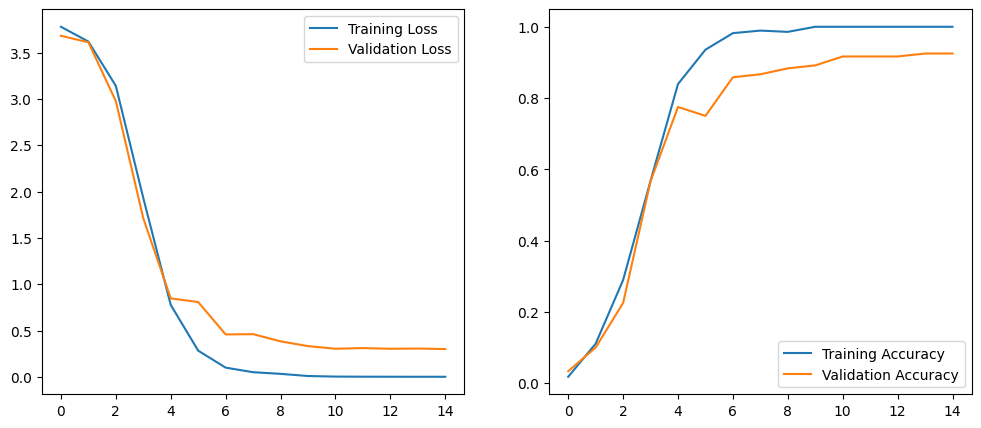

4/4 [==============================] - 0s 40ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       0.67      0.67      0.67         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      0.83      0.91         6
          15       0.83      1.00      0.91         5
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()



# Evaluate performance
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [9]:
import numpy as np
from PIL import Image

# Load a single image for testing
def load_image(image_path):
    image = Image.open(image_path).resize((92, 112)).convert('L')
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize the image
    image_array = image_array[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
    return image_array

# Make a prediction and return the class label
def predict_image(model, image_path):
    image_array = load_image(image_path)
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class

# Example usage
test_image_path = '/content/DALL·E 2024-05-06 13.58.34 - A grayscale image of a person positioned upright and frontal with a dark homogeneous background. The person should have a neutral facial expression, w.webp'  # Adjust this path
predicted_class_index = predict_image(model, test_image_path)

# Retrieve the label name using the label indices from the training set
label_name = np.unique(y_train)[predicted_class_index]
print(f'Predicted Class Index: {predicted_class_index}, Label: {label_name}')


1/1 [==============================] - 0s 17ms/step
Predicted Class Index: 32, Label: 32
